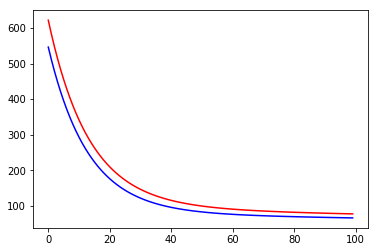

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from numpy import dot
#from numpy.linalg import inv

#参数设置
lr=1e-2
iteration=100

#读取数据集
def get_data():
    data = load_svmlight_file("housing_scale")
    return data[0], data[1]

#设置参数生成训练集以及验证集
def split(x,y,tsize=0.2 ,rstate=33):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tsize, random_state=rstate)
    return x_train, x_test, y_train, y_test

#loss函数计算
def loss(x,y,w):
    return np.dot((y-np.dot(x,w)).T,(y-np.dot(x,w)))

#梯度计算
def gradient(x,y,w):
    return np.dot(x.T,np.dot(x,w))-np.dot(x.T,y)

x, y = get_data()
x_train, x_test, y_train, y_test = split(x,y,0.1,23)
x_train = x_train.toarray()
x_test = x_test.toarray()
w = np.zeros((13,))
numOfSample=x_train.shape[0]
numOfValidation=x_test.shape[0]
Trainloss=np.zeros(iteration) #记录每次迭代的训练集Loss
Validateloss=np.zeros(iteration) #记录每次迭带的验证机Loss

for i in range(iteration): #主迭代过程
    grad = gradient(x_train,y_train,w)/numOfSample #针对全部样本进行梯度计算
    w = w-lr*grad #根据学习率以及梯度更新权值
    trainingLoss=loss(x_train,y_train,w)/numOfSample
    validationLoss=loss(x_test,y_test,w)/numOfValidation
    Trainloss[i]=trainingLoss
    Validateloss[i]=validationLoss

#根据训练集的Loss以及验证集的Loss绘图
plt.plot(np.arange(iteration),Trainloss,label='trainloss',color='b')
plt.plot(np.arange(iteration),Validateloss,label='validationloss',color='r')
plt.show()